# Homework 1

##  1. Sort the following functions in decreasing order of asymptotic complexity ($O(f(n))$):

- $f_1(n) = n^\sqrt{n}$
- $f_2(n) = 2^n$
- $f_3(n) = {n\choose 2}$
- $f_4(n) = \sum_{i=2}^n (i-1)$

In [23]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import statistics

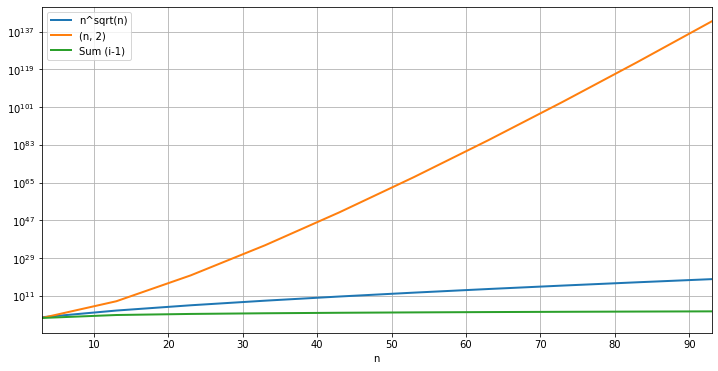

In [27]:
def f1(n):
    y = n**pow(n, 0.5)
    return y

def f2(n):
    y = 2**n
    return y

def f3(n, k):
    p1 = 1
    p2 = 1
    for i in range (0, n):
        x1 = n - i
        p1 = p1 * x1
    for j in range (0, k):
        x2 = k - j
        p2 = p2 * x2
    y = (p1)/((n-k)*p2)
    return y

def f4(n):
    sum = 0
    for i in range (2, n+1):
        sum = sum + (i-1)
    return sum

r = pd.DataFrame()
r['n'] = np.arange (3, 100, 10)
r['n^sqrt(n)'] = [f1(n) for n in r['n']]
r['2^n'] = [f2(n) for n in r['n']]
r['(n, 2)'] = [f3(n, 2) for n in r['n']]
r['Sum (i-1)'] = [f4(n) for n in r['n']]
r.plot(x = 'n',logy = True, lw = 2, figsize = (12,6))
plt.xlabel('n')
plt.grid()

### Orden decreciente de acuerdo al grafico

1. ${n\choose 2}$

2. $n^\sqrt{n}$

3. $\sum_{i=2}^n (i-1)$ 

4. $2^n$

## 2. Implement in Python the insertion sort procedure to sort into non-increasing instead of non-decreasing order 

1. Use the `time` function to measure the execution time for the best and worst inputs of size between 10 and 1,000 (use steps of 10)
2. Plot the best and worst execution times measured in (2.1) as a function of $n$
3. Use the `random` function to generate randomly sorted inputs to calculate the execution time. For each $n$ run the program for 100 different inputs. Do for $n = 100,200, \dots, 1000$.
4. Plot the mean, median, and standard deviation as a function of $n$ for the values obtained in 2.3


In [3]:
##EJERCICIO 2.1:
def best_input():
    array = []
    for i in range(1000, 9, -10):
        array.append(i)
    return array

def worst_input():
    array = []
    for i in range (10, 1001, 10):
        array.append(i)
    return array

def InsertionSort(array):
    start = time.time()
    for i in range(1, len(array)):
        x = array[i]
        j = i-1
        while (j>=0 and array[j] < x):
            #Se inserta el valor en orden descendente
            array[j+1] = array[j]
            j = j-1
        array[j+1] = x    
    return time.time() - start

In [4]:
##EJERCICIO 2.2:
r = pd.DataFrame()
r['n'] = range(1,10000)

Text(0, 0.5, 'us')

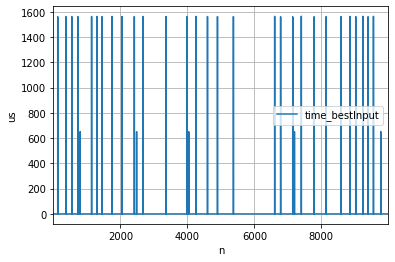

In [5]:
#Plot del mejor input:
r['time_bestInput'] = [InsertionSort(best_input()) for x in r['n']]
r['time_bestInput'] = 100000*r['time_bestInput']
r.plot(x='n', y='time_bestInput')
plt.grid()
plt.ylabel('us')

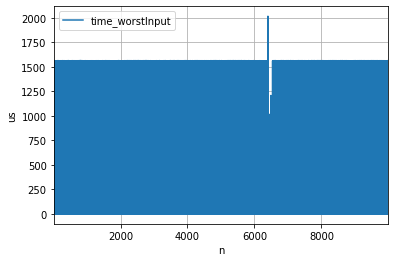

In [6]:
#Plot del peor input:
r['time_worstInput'] = [InsertionSort(worst_input()) for x in r['n']]
r['time_worstInput'] = 100000*r['time_worstInput']
r.plot(x='n', y='time_worstInput')
plt.ylabel('us')
plt.grid()

In [7]:
##EJERCICIO 2.3:
def RandomList(n):
    array = [random.randint(1, n) for i in range(n)]
    return array

h = pd.DataFrame()
h['n'] = range(1,100)

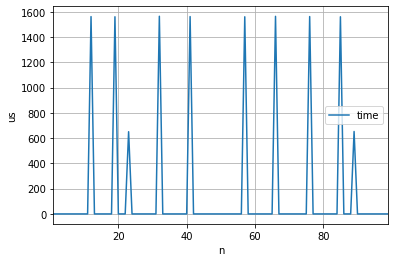

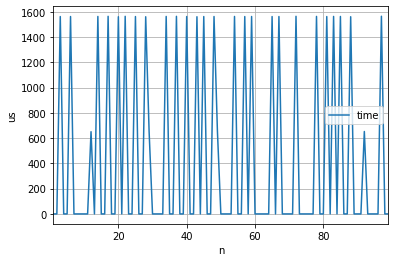

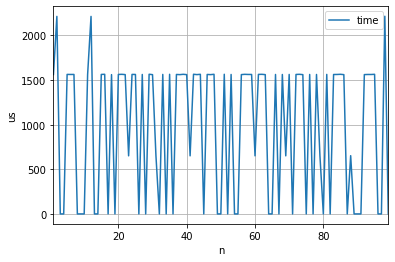

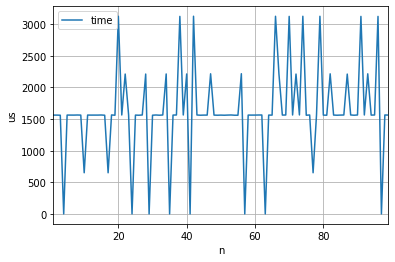

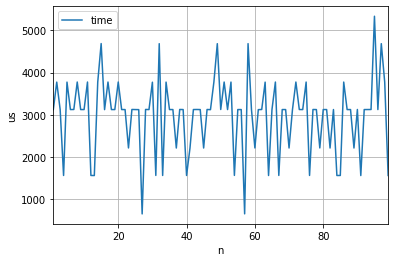

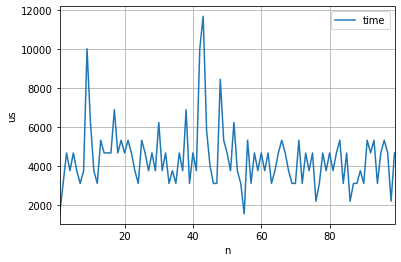

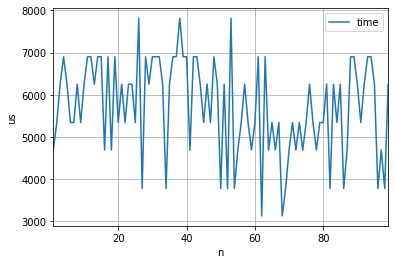

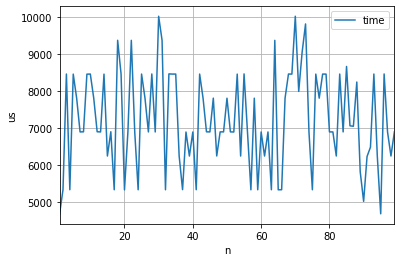

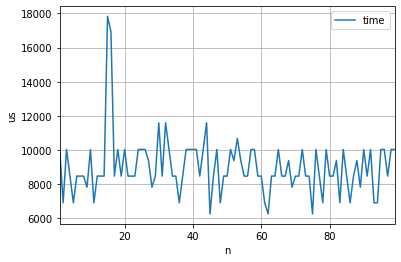

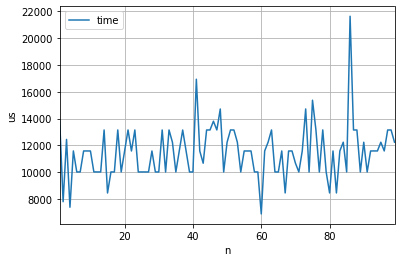

In [8]:
#Plot si n = 100, 200, 300, ..., 1000
Tmean = []
Tmedian = []
TstDev = []
mean = 0
stdev = 0
median = 0
for i in range(100, 1001, 100):
    h['time'] = [InsertionSort(RandomList(i)) for x in h['n']]
    h['time'] = 100000*h['time']
    h.plot(x='n', y='time')
    plt.ylabel('us')
    plt.grid()
    mean = sum(h['time'])/len(h['time'])
    Tmean.append(mean)
    stdev = statistics.stdev(h['time'])
    TstDev.append(stdev)

In [19]:
#EJERCICIO 2.4:

m = pd.DataFrame()
m['n'] = range(100, 1001, 100)
m['mean'] = Tmean
m.plot(x = 'n', y = 'mean')
plt.ylabel('us')
plt.grid()

ValueError: Length of values does not match length of index

## 3.  CLRS 2.1-4
pg. 22

In [ ]:
A = [1, 1, 0]
B = [1, 0, 1]
def Add(A, B):
    C = []
    llevo = 0
    for i in range (0, len(A)):
        x = A[i] + B[i]
        if llevo == 1:
            x = x + llevo
            llevo = 0
        if (x == 2):
            C.append(0)
            llevo = 1
        else:
            C.append(x)
    print (C)
Add(A,B)

## 4.  CLRS 3.1-1
pg. 52

- $ max(f(n), g(n)) = f(n)$ si $f(n) \geq g(n)$

- $ max(f(n), g(n)) = g(n)$ si $g(n) \geq f(n)$

Por tanto, sea cual sea el maximo $ max(f(n), g(n)) \leq f(n) + g(n)$ (a)

Ahora, recordando la definicion de la notacion $\Theta$, obtenemos que:

> $c_1 \times (f(n) + g(n)) \leq max(f(n), g(n)) \leq c_2 \times (f(n) + g(n))$

Asi, vemos que $c_2$ puede ser cualquier valor $\geq 1$, ya que de cualquier forma se cumple lo expresado en (a).

Por otro lado, dado que no existe informacion sobre las funciones no podemos saber si hay algun valor $c_1$ que pueda cumplir con la inecuacion. Pero podemos darnos cuenta de que $c_1$ debe ser una fraccion para asi reducir el crecimiento de $f(n) + g(n)$ para que este sea menor que $max(f(n), g(n))$.

Dependiendo de la forma de la ecuacion de $f(n)$ y $g(n)$ se cumple o no que:

$ max(f(n), g(n)) = \Theta (f(n) + g(n))$

## 5. CLRS 3.1-2
pg. 52

Recordemos la notacion $\Theta$: 

> $0 \leq c_1 \times n^b \leq (n+a)^b \leq c_2 \times n^b$

Notamos a primera vista que $n^b \leq (n+a)^b$. Pero esto no se cumple si $a<0$, debido a que la funcion $(n+a)^b$ se podria hacer negativa. Por tanto, $a$ debe estar como valor absoluto, para que cualquier valor de $a$ y $b$ asignado de como resultado una funcion siempre positiva. Sin embargo, dado que $a$ puede ser cero, la unica manera de que la inecuacion se cumpla es que $c_1$ sea igual a $1$, pues de esa manera la funcion $c_1 \times n^b$ no crece mas rapido que $(n+a)^b$.

Ahora, fijemonos en $(n+a)^b \leq c_2 \times n^b$. La unica forma de que esto se cumpla es que $c_2$ sea igual a un valor $x^b$, donde $x$ es $\geq a$. Asi, si $c_2 = x^b$, $(x \times n)^b$ crece mas rapido que $(n+a)^b$  

Por todo esto se cumple que:

$(n+a)^b = \Theta (n^b)$, Siempre y cuando $a$ sea valor absoluto.

## 6. CLRS 3.1-6
pg. 53

Nuevamente, la notacion $\Theta$ nos dice lo siguiente:

> $0 \leq c_1 \times g(n) \leq f(n) \leq c_2 \times g(n)$

El peor caso de ejecucion seria que se demorara el mayor tiempo posible. Por ende, este caso se relaciona con la notacion $O(g(n))$, la cual nos da un limite superior de una funcion $f(n)$. Su definicion es la siguiente:

> $0 \leq f(n) \leq c \times g(n)$

En el mejor caso es todo lo contrario, la ejecucion se demora el menor tiempo posible. Asi que, aqui usamos la notacion $\Omega(g(n))$, la cual nos da el limite inferior de una funcion $f(n)$. Su definicion es la siguiente:

> $0 \leq c \times g(n) \leq f(n)$

Podemos observar entonces que un algoritmo es $\Theta(g(n))$ solamente si se cumplen ambos casos, ya que dada su definicion al principio, debe existir un limite superior e inferior para una funcion $f(n)$.

## 7. CLRS 3-4 (a,b,e,g)
pg. 62

### a) $f(n) = O(g(n))$ implica $g(n) = O(f(n))$

$f(n) = O(g(n))$ quiere decir que:

> $f(n) \leq c \times g(n)$

Y $g(n) = O(f(n))$ es:

> $g(n) \leq c \times f(n)$

El primero nos dice que $c \times g(n)$ crece mas rapido $f(n)$. Pero de ninguna manera esto implica que $g(n)$ crezca menos que $c \times f(n)$. Un ejemplo de esto es lo siguiente:

Si $f(n) = n$ y $g(n) = n^5$, ya podemos darnos cuenta que $f(n) \leq c \times g(n)$, pero es imposible que esto implique que $g(n)$ crezca mas lento que una funcion $c \times f(n)$, pues un exponente siempre crece mas rapido que una funcion lineal.


### b) $f(n) + g(n) = \Theta(min(f(n), g(n)))$

- $ min(f(n), g(n)) = f(n)$ si $f(n) < g(n)$

- $ min(f(n), g(n)) = g(n)$ si $g(n) < f(n)$

La notacion $\Theta$ nos dice:

> $c_1 \times min(f(n), g(n)) \leq f(n) + g(n) \leq c_2 \times min(f(n), g(n))$

Si tomamos como ejemplo que $f(n) = 1$ y $g(n) = n$, el $min(f(n), g(n))$ es $1$. Asi:

> $c_1 \leq 1 + n \leq c_2$

Nos damos cuenta entonces que no existe ninguna constante $c_2$ que haga que se cumpla esta inecuacion. Por ello esta premisa no es verdadera.

### e) $f(n) = O((f(n))^2)$

La notacion $O$ nos dice lo siguiente:

> $f(n) \leq c \times (f(n))^2$

A primera vista, ya nos damos cuenta de que $(f(n))^2$ siempre es $\geq f(n)$. Asi que si, esta premisa es verdadera.

### g) $f(n) = \Theta(f(n/2))$

La notacion $\Theta$ nos dice:

> $c_1 \times f(n/2) \leq f(n) \leq c_2 \times f(n/2)$

$f(n/2)$ siempre es menor a $f(n)$. Por otro lado tambien es posible que $f(n)$ sea $< f(n/2)$ si se usa la constante $c$ correcta. Por ello, podemos decir que esta premisa es verdadera.